# Stochastic Gradient Descent
This notebook aims to help gain a better understanding of stochastic gradient descent by defining a function and minimizing its loss function by using different gradient descents, one of them being the stochastic gradient descent. The gradient descents are compared to observe the difference in the results from the choice of the gradient descent.

### Imports 
Import the libraries necessary to define the neural network function and the different gradient descents as well as plot the functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

### Define Training Data
Define 30 input/output pairs as training data for the neural network model

In [2]:
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])

### Define the Gabor Model 
Define a neural network model (Gabor model) with two parameters (horizontal offset, frequency)

In [3]:
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

### Define Gabor Model Plotting Function

In [4]:
def draw_model(data,model,phi,title=None):
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)
  fig, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

### Define Parameters
Define parameters for the Gabor model

In [5]:
phi = np.zeros((2,1))
phi[0] =  -5  # Horizontal offset
phi[1] =  25  # Frequency

### Plot the Gabor Model 

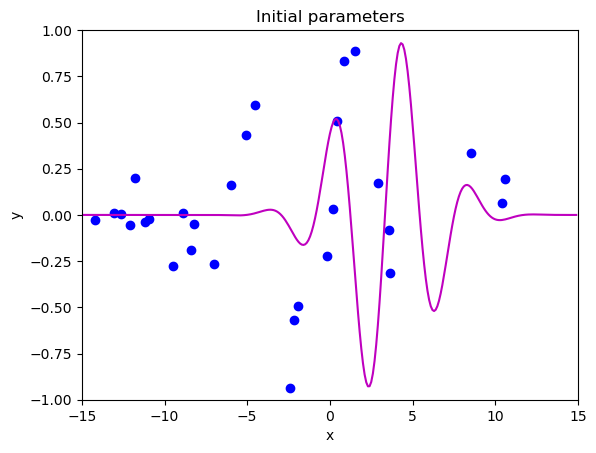

In [6]:
draw_model(data,model,phi, "Initial parameters")

### Define Loss Function (Least Squares Loss)

In [7]:
def compute_loss(data_x, data_y, model, phi):
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y - data_y)**2)

  return loss

### Compute the Loss 
Compute the loss of the Gabor model with the defined parameters by using the least squares loss function and the training data

In [8]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Loss = %3.3f'%(loss))

Loss = 16.419


### Define Least Squares Loss Plotting Function

In [9]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of offset/frequency values to plot
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset phi[0]'); ax.set_ylabel('Frequency, phi[1]')
  plt.show()

### Plot the Computed Least Squares Loss Function

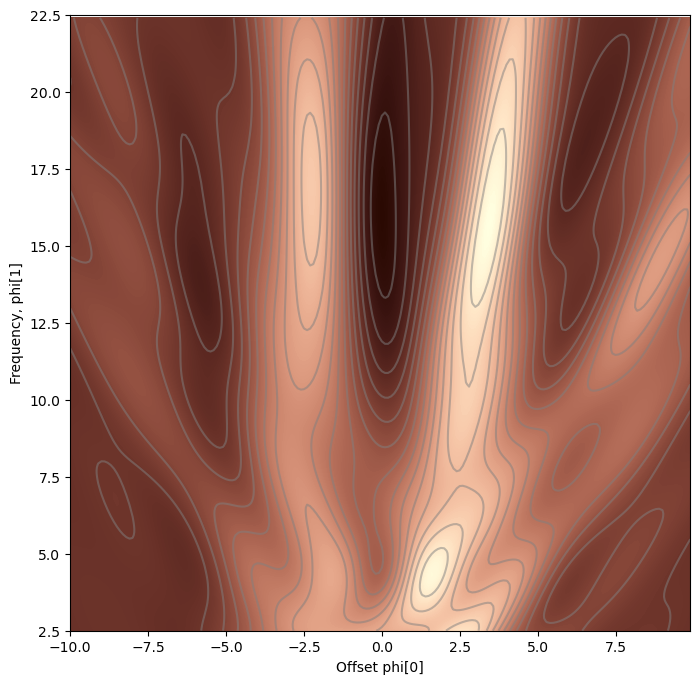

In [10]:
draw_loss_function(compute_loss, data, model)

### Define Gabor Derivative (phi0) Function
Define a function that takes the partial derivative of the Gabor model with respect to phi0

In [11]:
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

### Define Gabor Derivative (phi1) Function
Define a function that takes the partial derivative of the Gabor model with respect to phi1

In [12]:
def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

### Define Gradient 
Compute the gradient of the Gabor model by defining a vector of the computed derivatives of the Gabor model with respect to each parameter (phi0, phi1)

In [13]:
def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

### Compute Gradient

In [15]:
gradient = compute_gradient(data[0,:],data[1,:], phi)

### Define 1D Loss Function 
Define a 1D loss function that is only dependent on the step size (alpha) of the point towards the negative gradient. Use the 1D loss function in the line search algorithm to compute the step size that results in the smallest loss.

In [16]:
def loss_function_1D(dist_prop, data, model, phi_start, gradient):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start+ gradient * dist_prop)

### Define a Line Search Algorithm

In [17]:
def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 15, verbose=False):
    # Initialize four points along the interval being searched
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # Loop the line search till the minimum of the loss function has been accurately estimated
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate the loss of all four points
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1: If point A is less than points B, C, and D then change B,C,D so they are half their current distance from A
        if np.argmin((lossa,lossb,lossc,lossd))==0:
          b = a+ (b-a)/2
          c = a+ (c-a)/2
          d = a+ (d-a)/2
          continue

        # Rule #2: If point b is less than point c then
        # 1) point d becomes point c, and
        # 2) point b becomes 1/3 between a and new d
        # 3) point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #3: If point c is less than point b then
        # 1) point a becomes point b, and
        # 2) point b becomes 1/3 between new a and d
        # 3) point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Compute the result
    return (b+c)/2.0

### Define the Gradient Descent Step Function
Define the gradient descent step function, which uses the negative gradient of the Gabor model and the step size (computed from the line search algorithm) to adjust the Gabor model's parameter value to decrease the loss of the model

In [18]:
def gradient_descent_step(phi, data,  model):
  # Step 1:  Compute the gradient
  gradient = compute_gradient(data[0,:],data[1,:], phi)
  # Step 2:  Update the parameters -- note we want to search in the negative (downhill direction)
  alpha = line_search(data, model, phi, gradient*-1, max_dist = 2.0)
  phi = phi - alpha * gradient
  return phi

### Define Parameters 
Define parameters for the Gabor model

In [19]:
n_steps = 21
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 8.5

### Compute Initial Loss 
Compute the initial loss of the Gabor model using the defined parameters

In [20]:
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])

### Plot the Initial Gabor Model 

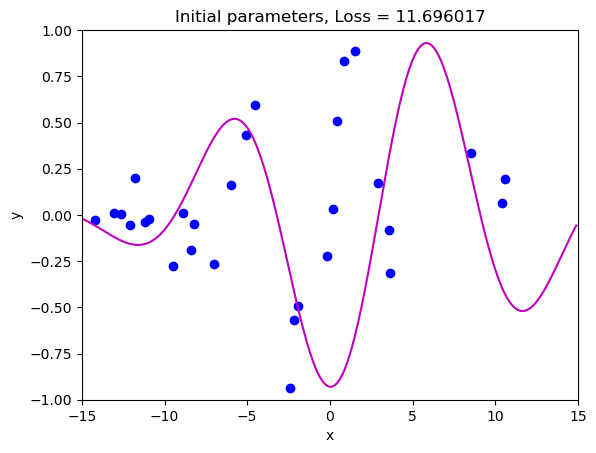

In [21]:
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

### Minimize the Loss Function
Minimize the loss function by computing the gradient descent and the step size, using the two values to compute the gradient descent step to adjust the parameter values and decrease the loss function of the Gabor model.

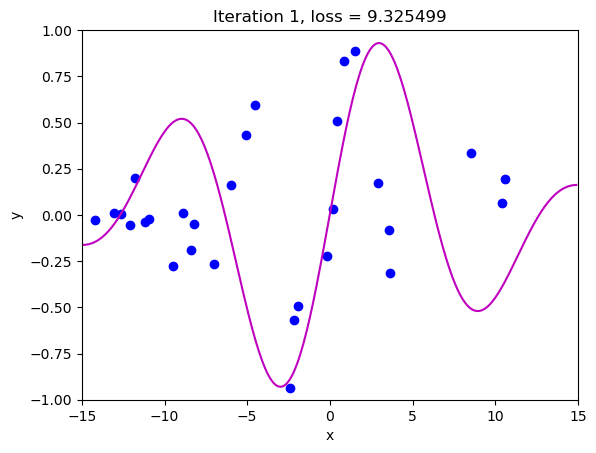

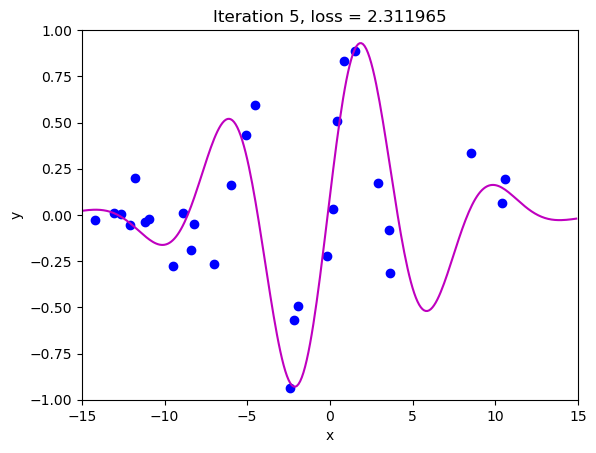

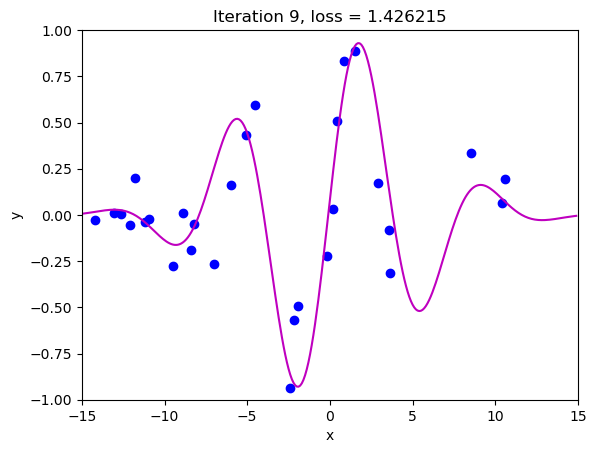

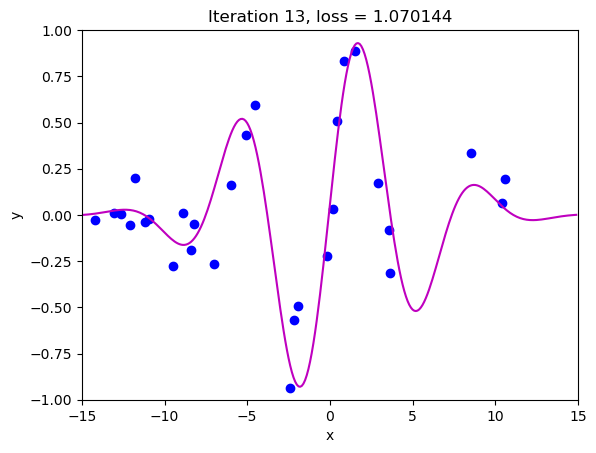

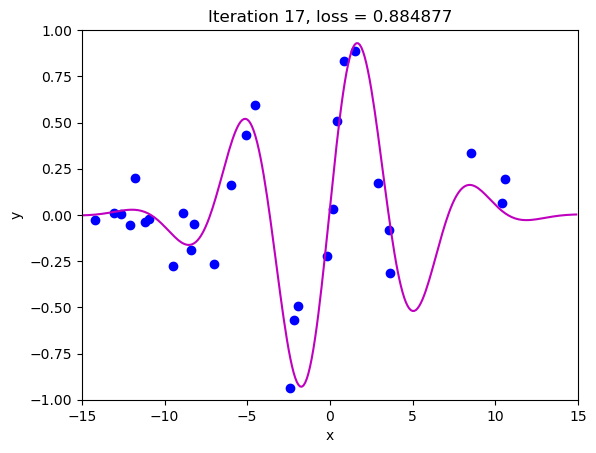

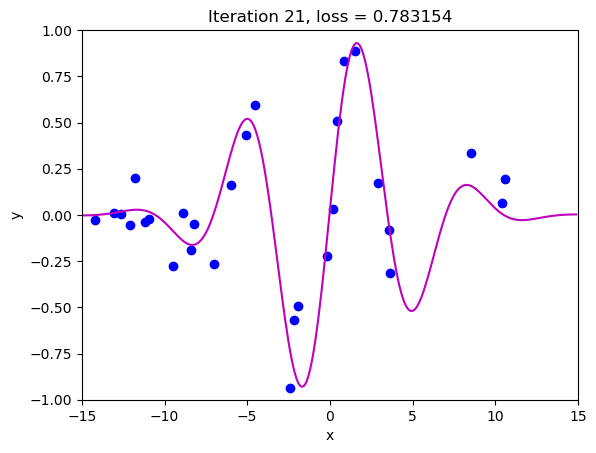

In [22]:
for c_step in range (n_steps):
  # Compute and undergo a gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Compute the loss and plot model every 4th step
  if c_step % 4 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

### Plot Intermediate Loss Functions 
Plot the intermediate loss functions throughout all the iterations

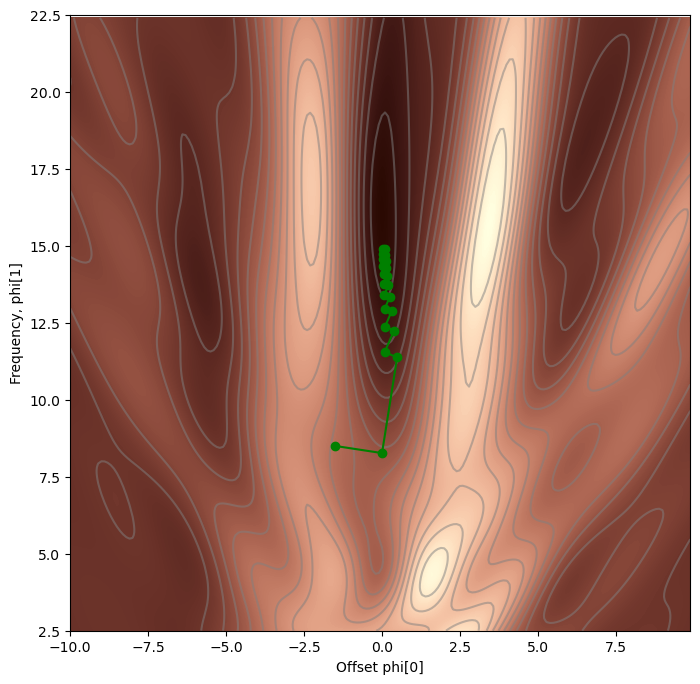

In [23]:
draw_loss_function(compute_loss, data, model,phi_all)

### Define the Gradient Descent Step Function (constant step size)
Define the Gradient Descent step function but instead of computing the step size using the line search algorithm, keep the step size a constant. Use the computed gradient and the constant step size to adjust the parameters to decrease the loss of the Gabor model

In [24]:
def gradient_descent_step_fixed_learning_rate(phi, data, alpha):
  gradient = compute_gradient(data[0,:], data[1,:], phi)
  phi = phi - alpha*gradient
  return phi

### Define Parameters 
Define parameters for the Gabor model

In [25]:
n_steps = 21
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 8.5

### Compute Initial Loss
Compute the initial loss of the Gabor model using the defined parameters

In [26]:
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])

### Plot the Initial Gabor Model

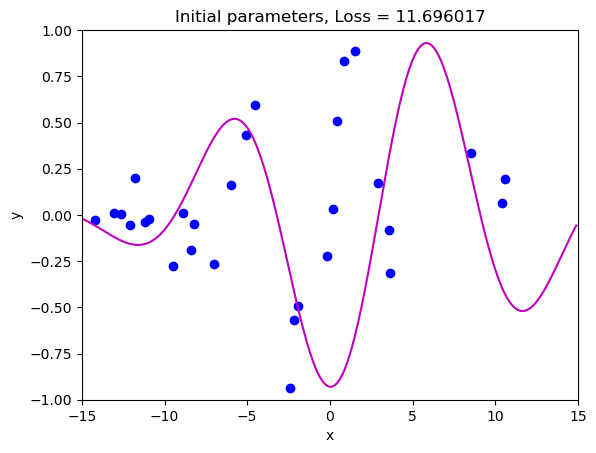

In [27]:
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

### Minimize the Loss Function 
Minimize the loss function by computing the gradient and using the gradient and the constant step size to adjust the parameters to decrease the loss of the Gabor model

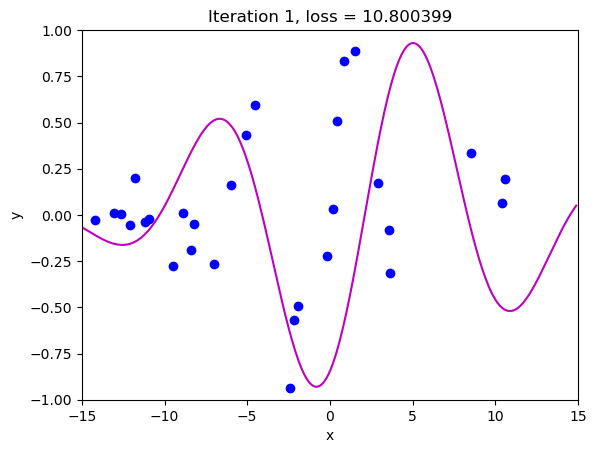

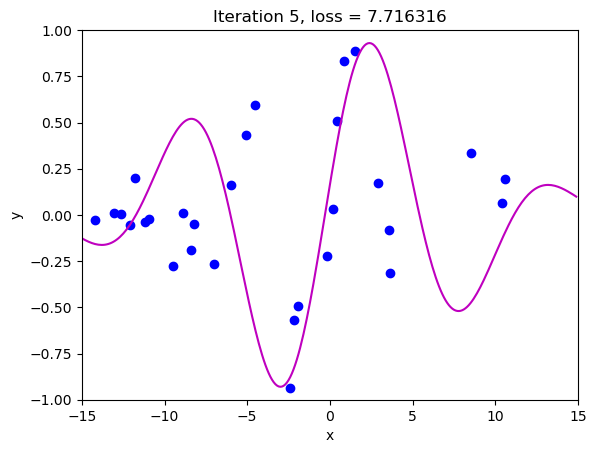

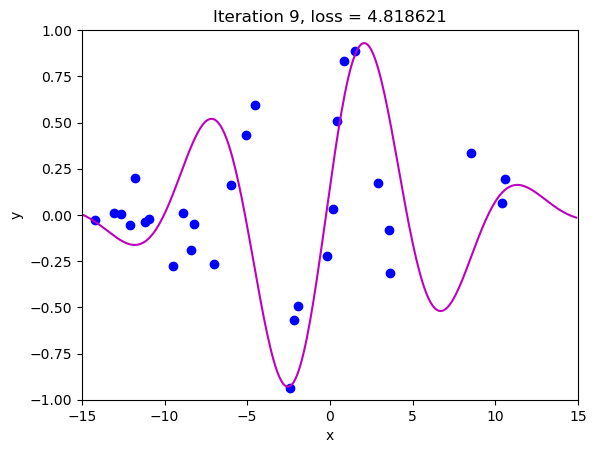

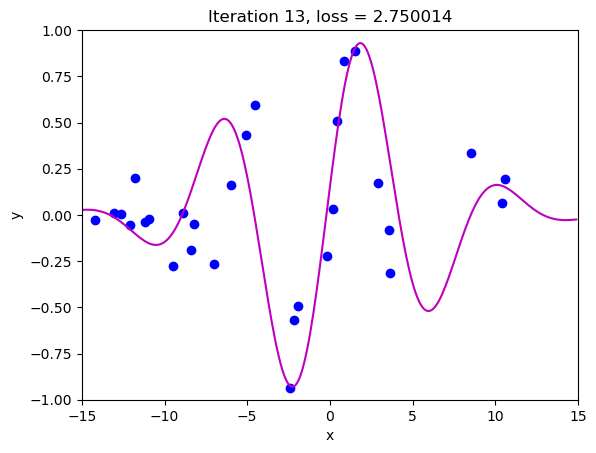

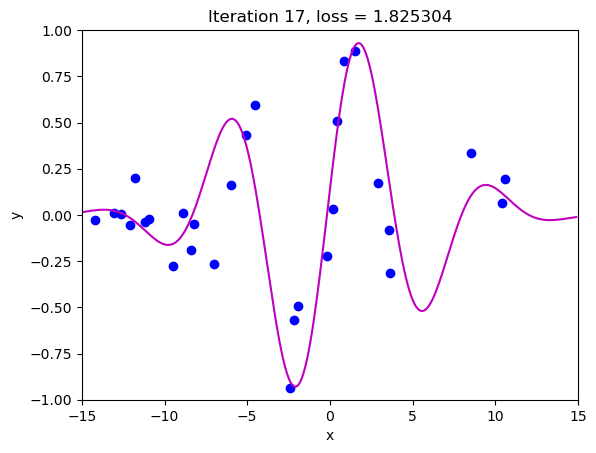

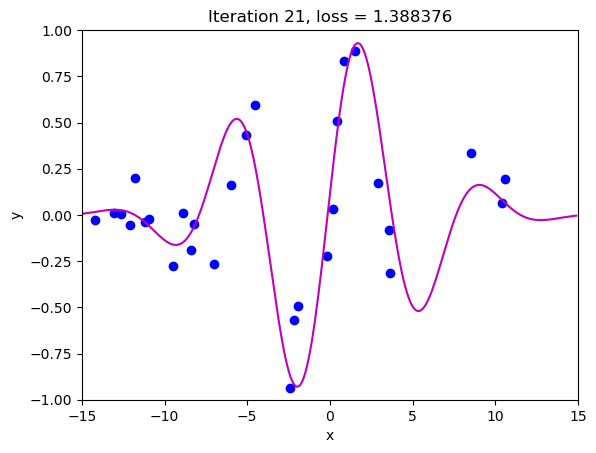

In [28]:
for c_step in range (n_steps):
  # Compute and undergo a gradient descent step with fixed learning rate
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step_fixed_learning_rate(phi_all[:,c_step:c_step+1],data, alpha =0.2)
  # Compute the loss and plot model every 4th step
  if c_step % 4 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

### Plot Intermediate Loss Functions 
Plot the intermediate loss functions throughout all the iterations

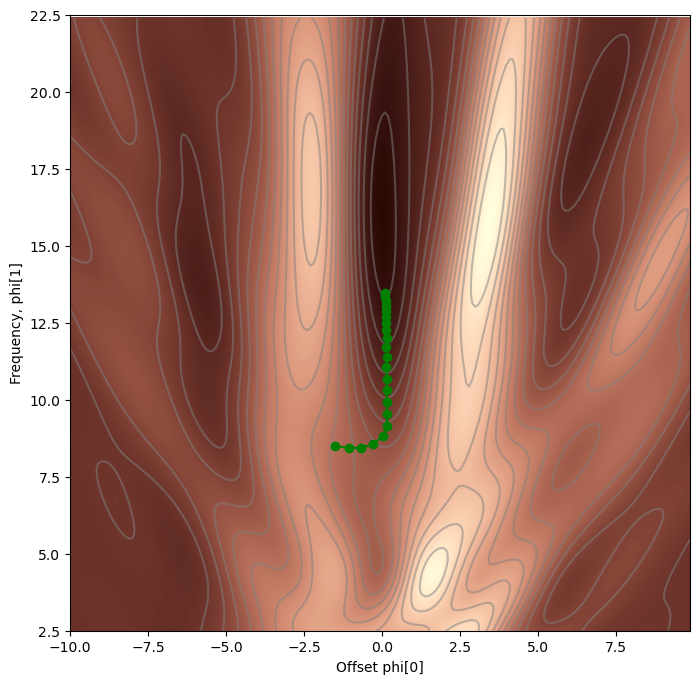

In [29]:
draw_loss_function(compute_loss, data, model,phi_all)

### Define the Stochastic Gradient Descent Step Function
Define the stochastic gradient descent step function, which is a type of gradient descent function that computes the gradient of only a random batch of data instead of the entire set of data

In [30]:
def stochastic_gradient_descent_step(phi, data, alpha, batch_size):
  shuffled_indices = np.random.permutation(data.shape[1])
  batch_indices = shuffled_indices[:batch_size]
  gradient = compute_gradient(data[0, batch_indices], data[1, batch_indices], phi)
  phi = phi - alpha*gradient
  return phi

### Define Parameters 
Define the parameters for the Gabor model

In [31]:
n_steps = 41
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 3.5
phi_all[1,0] = 6.5

### Compute Initial Loss
Compute the initial loss of the Gabor model by using the defined parameters

In [32]:
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])

### Plot the Initial Gabor Model

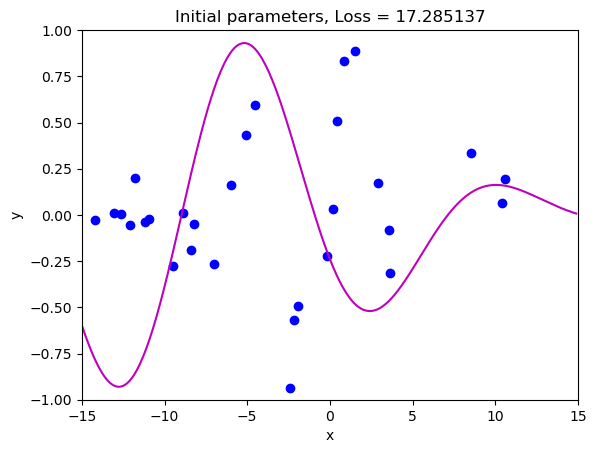

In [33]:
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

### Minimize the Loss Function 
Minimize the loss function by computing the stochastic gradient descent step and the step size and using these values to adjust the parameter to decrease the loss of the Gabor model

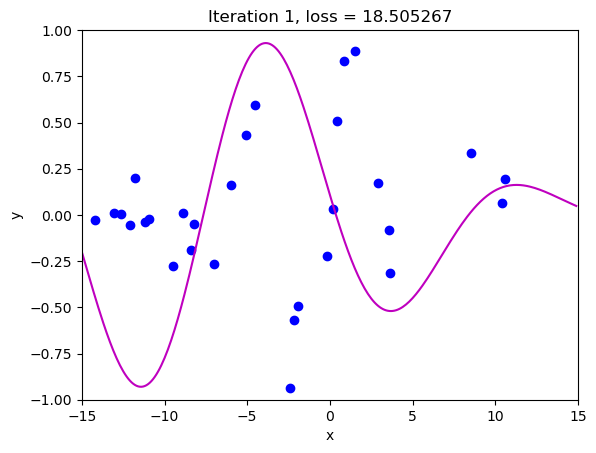

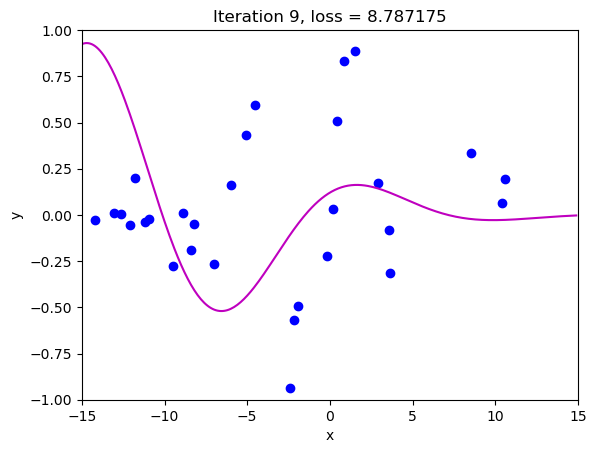

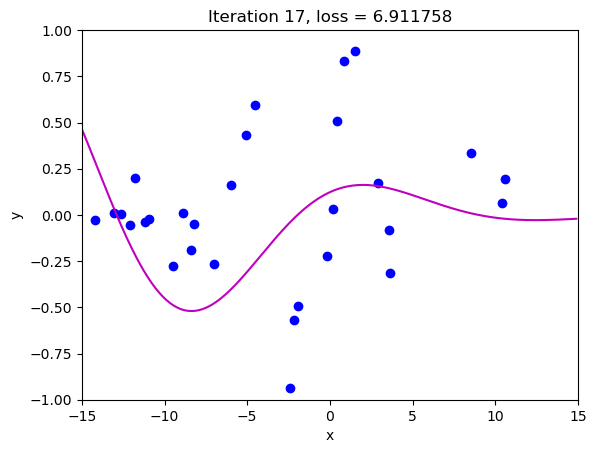

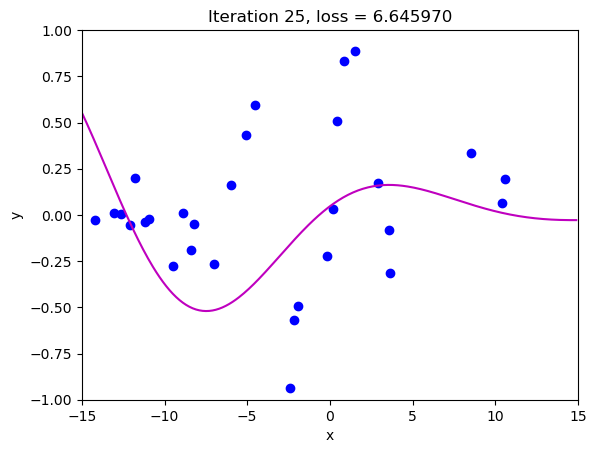

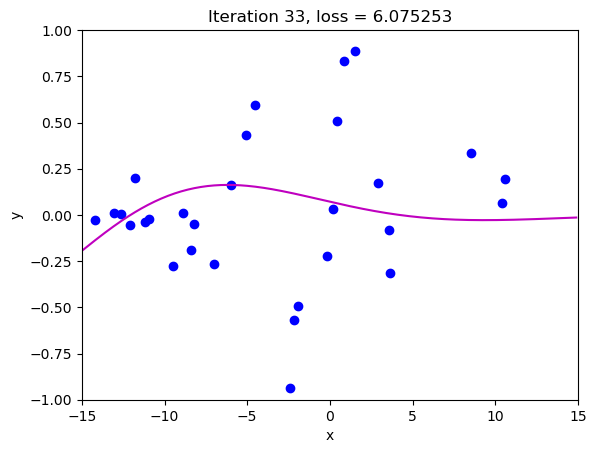

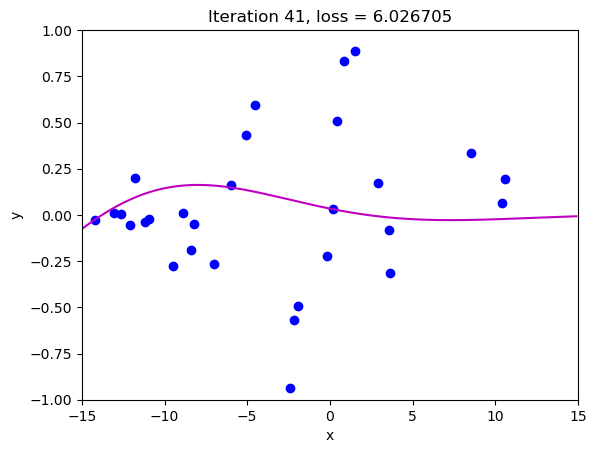

In [34]:
for c_step in range (n_steps):
  # Compute and undergo a stochastic gradient descent step
  phi_all[:,c_step+1:c_step+2] = stochastic_gradient_descent_step(phi_all[:,c_step:c_step+1],data, alpha =0.8, batch_size=5)
  # Compute the loss and plot model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
    draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

### Plot Intermediate Loss Functions 
Plot the intermediate loss functions throughout all the iterations

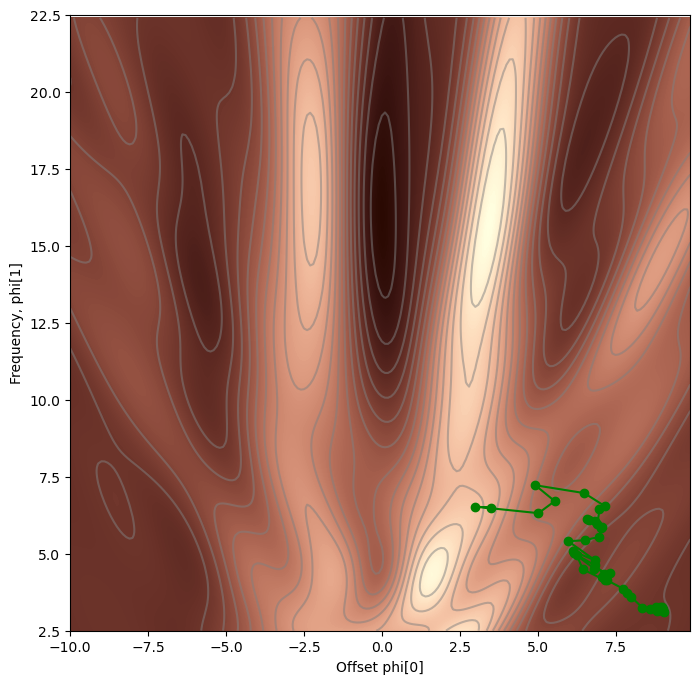

In [35]:
draw_loss_function(compute_loss, data, model,phi_all)